In [1]:
import pandas as pd
import matplotlib.pyplot as pls
from soccerplots.radar_chart import Radar

In [2]:
#read in the data
df = pd.read_csv('radars20202021.csv')

In [3]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,19.7,0,18,...,20.3,3,0,0,1.2,1.2,0.07,-1.2,-1.2,Matches
1,2,Tammy Abraham,eng ENG,FW,Chelsea,22.0,1997.0,11.6,6,32,...,9.7,0,0,0,6.4,6.4,0.20,-0.4,-0.4,Matches
2,3,Che Adams,sco SCO,FW,Southampton,24.0,1996.0,29.6,9,56,...,13.1,0,0,0,8.8,8.8,0.16,0.2,0.2,Matches
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,22.0,1997.0,32.8,0,20,...,8.8,0,0,0,1.1,1.1,0.05,-1.1,-1.1,Matches
4,5,Adrián,es ESP,GK,Liverpool,33.0,1987.0,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [4]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [5]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,19.7,0,18,...,20.3,3,0,0,1.2,1.2,0.07,-1.2,-1.2,Matches
1,2,Tammy Abraham,eng ENG,FW,Chelsea,22.0,1997.0,11.6,6,32,...,9.7,0,0,0,6.4,6.4,0.20,-0.4,-0.4,Matches
2,3,Che Adams,sco SCO,FW,Southampton,24.0,1996.0,29.6,9,56,...,13.1,0,0,0,8.8,8.8,0.16,0.2,0.2,Matches
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,22.0,1997.0,32.8,0,20,...,8.8,0,0,0,1.1,1.1,0.05,-1.1,-1.1,Matches
4,5,Adrián,es ESP,GK,Liverpool,33.0,1987.0,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [6]:
df = df[(df['Player']=='Tammy Abraham') | (df['Player']=='Pierre-Emerick Aubameyang')].reset_index()

In [7]:
df

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,2,Tammy Abraham,eng ENG,FW,Chelsea,22.0,1997.0,11.6,6,...,9.7,0,0,0,6.4,6.4,0.20,-0.4,-0.4,Matches
1,31,32,Pierre-Emerick Aubameyang,ga GAB,FW,Arsenal,31.0,1989.0,25.9,10,...,13.5,0,2,2,10.6,9.1,0.16,-0.6,-1.1,Matches


In [8]:
df = df.drop(['index','Rk','Nation','Pos','Squad','Age','Born','90s','PKatt','FK','PK','Matches'],axis=1)

In [9]:
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Tammy Abraham,6,32,13,40.6,2.77,1.13,0.19,0.46,9.7,6.4,6.4,0.20,-0.4,-0.4
1,Pierre-Emerick Aubameyang,10,56,19,33.9,2.16,0.73,0.14,0.42,13.5,10.6,9.1,0.16,-0.6,-1.1


In [10]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

In [16]:
# add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*0.25)
    
    b = max(df[params][x])
    b = b+ (b*0.25)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'Tammy Abraham':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Pierre-Emerick Aubameyang':
        b_values = df.iloc[x].values.tolist()

a_values=a_values[1:]
b_values=b_values[1:]

values =[a_values,b_values]


In [17]:
values

[[6, 32, 13, 40.6, 2.77, 1.13, 0.19, 0.46, 9.7, 6.4, 6.4, 0.2, -0.4, -0.4],
 [10, 56, 19, 33.9, 2.16, 0.73, 0.14, 0.42, 13.5, 10.6, 9.1, 0.16, -0.6, -1.1]]

In [18]:
# title

title = dict(
    title_name = 'Tammy Abraham',
    title_color = 'blue',
    subtitle_name = 'Chelsea F.C.',
    subtitle_color = 'blue',
    title_name_2 = 'Pierre-Emerick Aubameyang',
    title_color_2 = 'red',
    subtitle_name_2 = 'Arsenal F.C.',
    subtitle_color_2 = 'red',
    title_fontsize = 18,
    subtitle_fontsize = 15
)

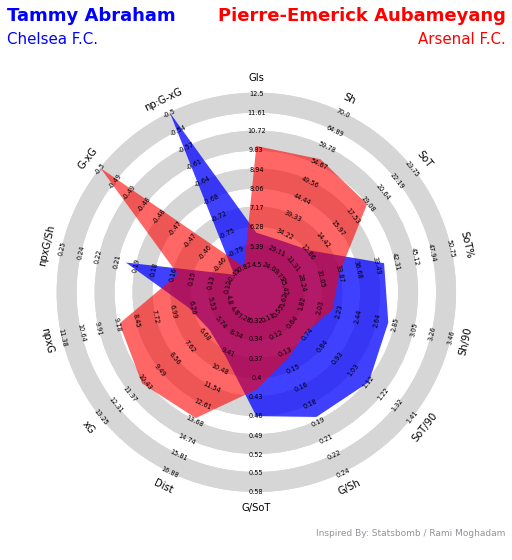

In [23]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,radar_color=['blue','red'],alphas=[.75,.6],title=title,compare=True,figsize=(1650,1350))

In [34]:
fig.savefig('tammyauba.png')